# Exploratory Data Analysis and Modelling

## Importing Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

## Reading the CSV file

In [5]:
track_df = pd.read_csv('spotifytrackinfo.csv')
track_df.head(1)

,Unnamed: 0,track_id,track_name,first_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature,mood
0,0,7tqhbajSfrz2F7E1Z75ASX,Ain't No Mountain High Enough,Marvin Gaye,0.663,0.6,7,-10.87,1,0.032,0.43,0.0,0.184,0.8,129.991,spotify:track:7tqhbajSfrz2F7E1Z75ASX,151667,4,happy


Since we already have an index column, we can drop the index.

In [6]:
track_df.drop('Unnamed: 0', inplace=True, axis=1)
track_df.head(1)

,track_id,track_name,first_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature,mood
0,7tqhbajSfrz2F7E1Z75ASX,Ain't No Mountain High Enough,Marvin Gaye,0.663,0.6,7,-10.87,1,0.032,0.43,0.0,0.184,0.8,129.991,spotify:track:7tqhbajSfrz2F7E1Z75ASX,151667,4,happy


In [7]:
# adding column "energetic"
def is_energetic(mood):
    return 1 if 'energetic' in mood else 0

track_df['energetic'] = track_df['mood'].apply(lambda x: is_energetic(x))
track_df.head()

,track_id,track_name,first_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature,mood,energetic
0,7tqhbajSfrz2F7E1Z75ASX,Ain't No Mountain High Enough,Marvin Gaye,0.663,0.600,7,-10.870,1,0.0320,0.430,0.000000,0.1840,0.800,129.991,spotify:track:7tqhbajSfrz2F7E1Z75ASX,151667,4,happy,0
1,1k1Bqnv2R0uJXQN4u6LKYt,Ain't No Sunshine,Bill Withers,0.527,0.415,4,-11.451,0,0.1220,0.457,0.000017,0.1170,0.515,78.169,spotify:track:1k1Bqnv2R0uJXQN4u6LKYt,125093,4,happy,0
2,745H5CctFr12Mo7cqa1BMH,My Girl,The Temptations,0.572,0.418,0,-10.738,1,0.0349,0.635,0.000000,0.0961,0.694,104.566,spotify:track:745H5CctFr12Mo7cqa1BMH,165000,4,happy,0
3,3zBhihYUHBmGd2bcQIobrF,(Sittin' On) the Dock of the Bay,Otis Redding,0.769,0.367,2,-11.226,1,0.0312,0.684,0.000016,0.0810,0.535,103.621,spotify:track:3zBhihYUHBmGd2bcQIobrF,163756,4,happy,0
4,3SdTKo2uVsxFblQjpScoHy,Stand by Me,Ben E. King,0.650,0.306,9,-9.443,1,0.0393,0.570,0.000007,0.0707,0.605,118.068,spotify:track:3SdTKo2uVsxFblQjpScoHy,180056,4,happy,0


# Exploring the Data

In [8]:
track_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,energetic
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,0.610639,0.556466,5.149296,-8.322734,0.706338,0.065444,0.365333,0.056656,0.169778,0.477549,118.535581,211259.254930,3.895775,0.274648
std,0.147548,0.222184,3.564007,3.620045,0.455599,0.065977,0.316665,0.173492,0.135339,0.242011,28.194598,51346.174221,0.377834,0.446494
min,0.112000,0.033200,0.000000,-24.646000,0.000000,0.023600,0.000008,0.000000,0.023200,0.027700,46.923000,87000.000000,1.000000,0.000000
25%,0.511000,0.392000,2.000000,-10.477750,0.000000,0.032400,0.070225,0.000000,0.096775,0.266000,97.040750,176354.500000,4.000000,0.000000
50%,0.621000,0.568500,5.000000,-7.753500,1.000000,0.041950,0.271000,0.000034,0.115000,0.470500,118.391500,207527.500000,4.000000,0.000000
75%,0.715000,0.731000,8.000000,-5.642000,1.000000,0.066625,0.635250,0.004542,0.189000,0.674000,135.232500,240149.750000,4.000000,1.000000
max,0.978000,0.997000,11.000000,0.080000,1.000000,0.563000,0.993000,0.949000,0.951000,0.980000,209.942000,486187.000000,5.000000,1.000000


## Checking if any missing values present

In [9]:
print (track_df.isnull().values.any())

False


In [10]:
# missing values for each feature
# verfying all should be 0
print (track_df.isnull().sum())

track_id            0
track_name          0
first_artist        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
uri                 0
duration_ms         0
time_signature      0
mood                0
energetic           0
dtype: int64


## Exploring relationship between features using correlation

In [11]:
features_df = track_df[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

# scaling data
scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(features_df)
features_df = pd.DataFrame(scaled_df, columns=features_df.columns)
features_df.describe()

#data is scaled but not centered.

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,0.575795,0.542920,0.468118,0.660166,0.706338,0.077575,0.367903,0.059701,0.157985,0.472381,0.439290
std,0.170379,0.230530,0.324001,0.146406,0.455599,0.122315,0.318899,0.182815,0.145871,0.254133,0.172953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.460739,0.372276,0.181818,0.573010,0.000000,0.016314,0.070713,0.000000,0.079300,0.250236,0.307435
50%,0.587760,0.555406,0.454545,0.683188,1.000000,0.034019,0.272905,0.000035,0.098944,0.464980,0.438406
75%,0.696305,0.724009,0.727273,0.768584,1.000000,0.079765,0.639725,0.004787,0.178702,0.678673,0.541713
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#centering the dataset
center = lambda x: x - x.mean()
features_df = features_df.apply(center)
features_df.describe()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.420000e+03,1.420000e+03,1.420000e+03,1.420000e+03,1.420000e+03,1.420000e+03,1.420000e+03,1.420000e+03,1.420000e+03,1.420000e+03,1.420000e+03
mean,3.252484e-17,-2.501911e-17,-2.001529e-17,1.751338e-17,7.380638e-17,-1.501147e-17,5.003822e-17,9.382166e-18,-5.003822e-18,5.504204e-17,-5.128918e-17
std,1.703792e-01,2.305297e-01,3.240007e-01,1.464064e-01,4.555994e-01,1.223153e-01,3.188993e-01,1.828151e-01,1.458711e-01,2.541327e-01,1.729528e-01
min,-5.757953e-01,-5.429196e-01,-4.681178e-01,-6.601661e-01,-7.063380e-01,-7.757511e-02,-3.679032e-01,-5.970078e-02,-1.579845e-01,-4.723813e-01,-4.392898e-01
25%,-1.150563e-01,-1.706432e-01,-2.862996e-01,-8.715588e-02,-7.063380e-01,-6.126069e-02,-2.971902e-01,-5.970078e-02,-7.868401e-02,-2.221451e-01,-1.318548e-01
50%,1.196451e-02,1.248608e-02,-1.357234e-02,2.302167e-02,2.936620e-01,-4.355583e-02,-9.499833e-02,-5.966548e-02,-5.904077e-02,-7.401798e-03,-8.838294e-04
75%,1.205095e-01,1.810895e-01,2.591549e-01,1.084176e-01,2.936620e-01,2.189444e-03,2.718222e-01,-5.491416e-02,2.071780e-02,2.062914e-01,1.024231e-01
max,4.242047e-01,4.570804e-01,5.318822e-01,3.398339e-01,2.936620e-01,9.224249e-01,6.320968e-01,9.402992e-01,8.420155e-01,5.276187e-01,5.607102e-01


In [13]:
# finding correlation between features
corr_matrix = features_df.corr()
print (corr_matrix)

                  danceability    energy       key  loudness      mode  \
danceability          1.000000  0.328006  0.024707  0.292807 -0.141857   
energy                0.328006  1.000000  0.009986  0.785707 -0.135593   
key                   0.024707  0.009986  1.000000 -0.012389 -0.105786   
loudness              0.292807  0.785707 -0.012389  1.000000 -0.097724   
mode                 -0.141857 -0.135593 -0.105786 -0.097724  1.000000   
speechiness           0.226337  0.142866  0.038207  0.161497 -0.130627   
acousticness         -0.373065 -0.732727 -0.017916 -0.601154  0.105797   
instrumentalness     -0.089933 -0.106008 -0.002945 -0.251905 -0.009051   
liveness             -0.014417  0.165957  0.013753  0.135028 -0.054065   
valence               0.460216  0.471141  0.006531  0.294851 -0.044409   
tempo                -0.058673  0.165064  0.020305  0.110527 -0.001124   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability         0.226337     -0

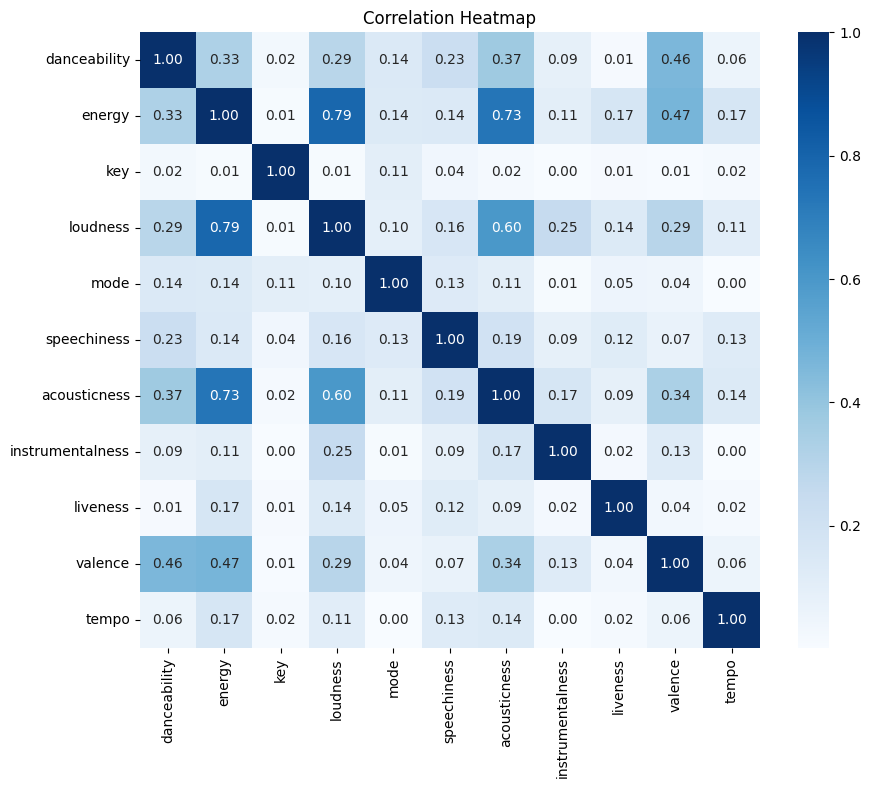

In [14]:
#For better visualizaion, using a heatmap
%matplotlib inline
plt.figure(figsize=(10, 8))
sns.heatmap(abs(corr_matrix), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

While `Loudness` and `Energy` have an almost 80% correlation, we have to keep in mind that most energetic songs tend to have high in both values but not all songs have high values in both. So we keep both of them.

## Choosing an appropriate model with K fold Cross Validation

We know the features are in `features_df` while the target classes are in `track_df['y]`. First let us perform a check with two models, kNN and Random Forest to check the performance of the model with 
1. all the features 
2. `Loudness` droppped

## Selecting a Model using K Fold Cross Validation (with all the features)

### kNN

In [15]:
#knn
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import statistics as stat

knn = KNeighborsClassifier(n_neighbors=10)
print("knn with 10 nn: ",stat.mean(cross_val_score(knn, features_df,track_df['energetic'], cv = 15)))



knn = KNeighborsClassifier(n_neighbors=20)
print("knn with 20 nn: ",stat.mean(cross_val_score(knn, features_df,track_df['energetic'], cv = 15)))


knn = KNeighborsClassifier(n_neighbors=100)
print("knn with 100 nn: ",stat.mean(cross_val_score(knn, features_df,track_df['energetic'], cv = 15)))

knn with 10 nn:  0.8072265770810003
knn with 20 nn:  0.8163419186263531
knn with 100 nn:  0.795879059350504


We are also noting that the model performs similary for 10,20 and 100 nearest neighbors. The max performance is achieved at n = 20. Hence we are better off choosing _20 nearest neighbors_.

### Random Forests

In [16]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
print("rf with 100 trees: ",stat.mean(cross_val_score(rf, features_df,track_df['energetic'], cv = 15)))

rf = RandomForestClassifier(n_estimators=200)
print("rf with 200 trees: ",stat.mean(cross_val_score(rf, features_df,track_df['energetic'], cv = 15)))

rf = RandomForestClassifier(n_estimators=500)
print("rf with 500 trees: ",stat.mean(cross_val_score(rf, features_df,track_df['energetic'], cv = 15)))

rf with 100 trees:  0.8360507652108996
rf with 200 trees:  0.8381784247853676
rf with 500 trees:  0.8381858902575587


Again, we are better off using n = 200 trees since the model plateaus with increase in number of trees. 200 trees (which is the default number of trees in the model) is sufficient to use as a parameter for our model.

## Cross Validating SVM and Logistic Regression

In [17]:
y = track_df['energetic'].copy()

### SVM

Doing a train_test_split to use GridSearch and find optimized parameters C and Gamma for Radial Kernel SVM.

In [18]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, y_train,y_test = train_test_split(features_df, y, test_size=0.2, random_state=42)
# Define the parameter grid 
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]} 

# Create a grid search object 
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2) 

# Fit the grid search object to the training data 
grid.fit(X_train, y_train) 

# Get the best parameters 
best_params_ = grid.best_params_


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

In [19]:
#SVM 
#using radial kernel
clf_svm = svm.SVC(kernel='rbf', C=best_params_['C'], gamma=best_params_['gamma'],random_state=42)
stat.mean(cross_val_score(clf_svm, features_df,y, cv = 15))

0.8375065322881673

### Logistic Regression

In [20]:
# logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
print("lr:",stat.mean(cross_val_score(lr, features_df,track_df['energetic'], cv = 15)))

lr: 0.8339828294139604


* All models are performing similarly. We will use SVM for classification since it is faster than Randmom forests. However, we might have to balance our dataset since most of our dataset is non energetic.

In [21]:
#before balancing using our prev clf_svm
clf_svm.fit(X_train,y_train)
y_pred = clf_svm.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)


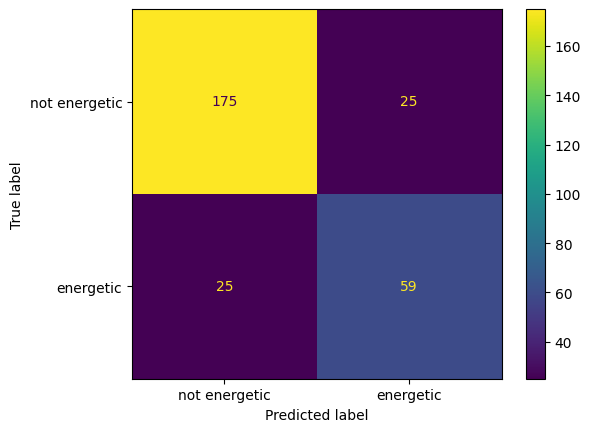

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
plt = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['not energetic','energetic'])
plt.plot()

In [24]:
classification_rep = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(classification_rep)

,0,1,accuracy,macro avg,weighted avg
precision,0.875,0.702381,0.823944,0.78869,0.823944
recall,0.875,0.702381,0.823944,0.78869,0.823944
f1-score,0.875,0.702381,0.823944,0.78869,0.823944
support,200.000,84.000000,0.823944,284.00000,284.000000


As the sample data is not balanced, we will use SMOTE technique to balance it out. This can increase the F1_score by a bit for Energetic.

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [26]:
print(y_train.value_counts())
print(y_train_resampled.value_counts())

energetic
0    830
1    306
Name: count, dtype: int64
energetic
0    830
1    830
Name: count, dtype: int64


We can see that the dataset has been balanced.

In [27]:
#after balacing
clf_svm2 = svm.SVC(kernel='rbf', C=best_params_['C'], gamma=best_params_['gamma'],random_state=42)
clf_svm2.fit(X_train_resampled,y_train_resampled)

SVC(C=100, gamma=0.01, random_state=42)

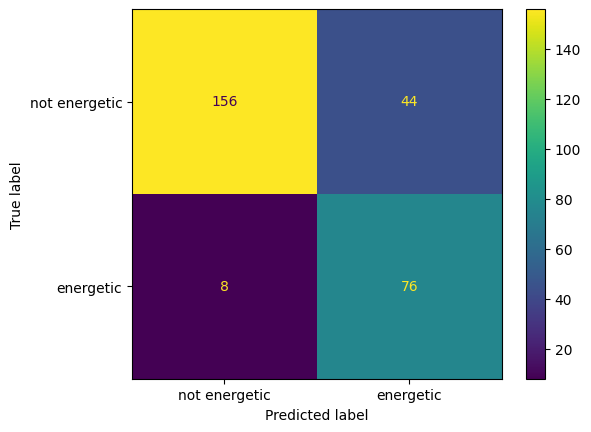

In [28]:
y_pred2 = clf_svm2.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred2)
plt = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['not energetic','energetic'])
plt.plot()

While `not energetic` performs a bit poorer but there is also an increase in correct classifications for `energetic` which is what we want.

In [29]:
classification_rep = classification_report(y_test, y_pred2, output_dict=True)
pd.DataFrame(classification_rep)

,0,1,accuracy,macro avg,weighted avg
precision,0.951220,0.633333,0.816901,0.792276,0.857197
recall,0.780000,0.904762,0.816901,0.842381,0.816901
f1-score,0.857143,0.745098,0.816901,0.801120,0.824003
support,200.000000,84.000000,0.816901,284.000000,284.000000


Our F1 score improved for Energetic and so did recall. We can use this model for some classfication tasks.

In [30]:
#renaming the model for concision
model = clf_svm2

## Exporting the model using Pickle library

In [31]:
import pickle

In [32]:
features = ['danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

In [33]:
data = {'features':features, 'model':model}

In [34]:
pickle.dump(data , open('model.pk1' , 'wb'))